<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Data and Kaggle Challenge

--- 
# Part 1

---

### Defining  Target and Features Model


In [85]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler#, PolynomialFeatures
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.linear_model import Lasso, LassoCV, ElasticNet, ElasticNetCV
 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [86]:
# Loading Data and Deleting Index from Train dataset
pd.set_option('display.max_rows', None)

train_ = pd.read_csv('../data/train_cleaned.csv')
test_ = pd.read_csv('../data/test_cleaned.csv')

train_.drop(columns = 'Unnamed: 0', inplace = True)
test_.drop(columns = 'Unnamed: 0', inplace = True)

In [87]:
len(test_.columns) == len(train_.columns)-1

True

In [88]:

#```['id', 'ms_subclass', 'ms_zoning', 'lot_area', 'lot_shape',
# 'land_contour', 'utilities', 'lot_config', 'land_slope', 'neighborhood',
# 'condition_1', 'condition_2', 'bldg_type', 'house_style',
# 'overall_qual', 'overall_cond', 'roof_style', 'roof_matl',
# 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area',
# 'exter_qual', 'exter_cond', 'foundation', 'bsmt_cond', 'bsmt_exposure',
# 'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'central_air',
#  'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd',
# 'functional', 'fireplaces', 'garage_finish', 'garage_cars',
# 'garage_area', 'garage_qual', 'garage_cond', 'paved_drive',
# 'wood_deck_sf', 'saleprice', 'total_bldg_sqft', 'bldg_age',
# 'total_baths', 'total_porch'],`


col_select_train = ['id','saleprice','lot_area','overall_qual','bedroom_abvgr', 'bldg_age',
                    'totrms_abvgrd', 'bldg_age',#, 'mas_vnr_area', 
                    'total_baths', 'garage_area', 'garage_cars', 
                    'total_bldg_sqft', 'overall_qual', 'bldg_type',
                    'neighborhood','ms_zoning','ms_subclass']

col_select_test= ['id', 'lot_area','overall_qual','bedroom_abvgr', 'bldg_age',
                     'totrms_abvgrd','bldg_age',# 'mas_vnr_area',
                    'total_baths', 'garage_area', 'garage_cars', 
                    'total_bldg_sqft', 'overall_qual','bldg_type',
                    'neighborhood','ms_zoning','ms_subclass']


train = train_[col_select_train].copy()
test = test_[col_select_test].copy()


In [89]:
# Cheking types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1719 non-null   int64  
 1   saleprice        1719 non-null   float64
 2   lot_area         1719 non-null   float64
 3   overall_qual     1719 non-null   int64  
 4   bedroom_abvgr    1719 non-null   int64  
 5   bldg_age         1719 non-null   int64  
 6   totrms_abvgrd    1719 non-null   int64  
 7   bldg_age         1719 non-null   int64  
 8   total_baths      1719 non-null   int64  
 9   garage_area      1719 non-null   float64
 10  garage_cars      1719 non-null   int64  
 11  total_bldg_sqft  1719 non-null   float64
 12  overall_qual     1719 non-null   int64  
 13  bldg_type        1719 non-null   object 
 14  neighborhood     1719 non-null   object 
 15  ms_zoning        1719 non-null   object 
 16  ms_subclass      1719 non-null   int64  
dtypes: float64(4),

In [90]:
# converting Categorical 'ms_subclass' coluns in object
train['ms_subclass']= train['ms_subclass'].astype(object)
test['ms_subclass']= test['ms_subclass'].astype(object)

In [91]:
# Setting category columns to Dummify
col_dummies = ['bldg_type','neighborhood','ms_zoning', 'ms_subclass']

In [92]:
df_train = pd.get_dummies(train, prefix_sep="__", columns = col_dummies, drop_first = True);
df_test = pd.get_dummies(test, prefix_sep="__", columns = col_dummies, drop_first = True);

/Users/silviaresende/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/Users/silviaresende/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [93]:
set_dif_train_dum = set(df_train.columns) - set(df_test.columns)
set_dif_train_dum

{'ms_subclass__150', 'neighborhood__Landmrk', 'saleprice'}

In [94]:
for d in set_dif_train_dum:
    if d != 'saleprice':
        print(d)
        df_train.drop(columns=d, inplace=True)

ms_subclass__150
neighborhood__Landmrk


In [95]:
set_dif_test_dum = set(df_test.columns) - set(df_train.columns) 
set_dif_test_dum

{'ms_zoning__I (all)'}

In [96]:
for d in set_dif_test_dum:
    if d != 'saleprice':
        print(d)
        df_test.drop(columns=d, inplace=True)

ms_zoning__I (all)


In [97]:
len(df_test.columns) == len(df_train.columns)-1

True

### Fitting Model
___

In [98]:
X = df_train.drop(columns=['id','saleprice'] )
y = df_train['saleprice']
print(X.shape)
print(y.shape)

(1719, 58)
(1719,)


In [99]:
X_test = df_test.drop(columns=['id'] )

### Setting up X e Y
___

In [100]:
X_train, X_val, y_train, y_val = train_test_split(
        X,  
        y,
        test_size = 0.3,     
        random_state = 42
 )

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1203, 58), (516, 58), (1203,), (516,))

### Scaling Data
___

In [101]:
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_val = sc.fit_transform(X_val)
Z_test = sc.fit_transform(X_test)


### Baseline Model
___

In [102]:
#Setting a Baseline and getting its Score
baseline_model = [y_train.mean()] * len(y_val)
r2_score(y_val, baseline_model)

-0.004519787056956215

Negative R2 square, so the model is very bad in predictions

### Fitting Regression Model
___

In [103]:
#Fitting Model
lr = LinearRegression()
lr.fit(Z_train, y_train)

LinearRegression()

In [104]:
#Cross Vaditadion Score
cross_val_score(lr, Z_train, y_train, cv=5).mean()

-1.194491711048948e+18

In [105]:
# Calcuate residual
lr_y_preds = lr.predict(Z_train)
residuals = y_train - lr_y_preds

# Metrics
print(f'MAE: {metrics.mean_absolute_error(y_train, lr_y_preds)}')
print(f'MSE: {metrics.mean_squared_error(y_train, lr_y_preds)}')
print(f'RMSE: {metrics.mean_squared_error(y_train, lr_y_preds, squared = False)}')
print(f'R2: {metrics.r2_score(y_train, lr_y_preds)}')


MAE: 14809.870050728296
MSE: 416872303.5136811
RMSE: 20417.450955339187
R2: 0.8598253241533164


**Interpretation** - 85.98% of the variance/variability of our y (pricesale), is explained by the features  in our model.

In [106]:
#Comparing scores
print(f'Training R2: {lr.score(Z_train, y_train)}')
print(f'Validatiaon R2: {lr.score(Z_val, y_val)}')
print(f'Diference (train/validation): {lr.score(Z_train, y_train)-lr.score(Z_val, y_val)}')

Training R2: 0.8598253241533164
Validatiaon R2: 0.8422733142022257
Diference (train/validation): 0.01755200995109063


In [107]:
# Creating a list of coeficients
list_coef = list(zip(X.columns, lr.coef_))

In [108]:
list_coef

[('lot_area', 4816.960667893658),
 ('overall_qual', 5890046431729666.0),
 ('bedroom_abvgr', -4389.458402860728),
 ('bldg_age', -5972365055610594.0),
 ('totrms_abvgrd', 649.4541939044915),
 ('bldg_age', 5972365055600644.0),
 ('total_baths', 6755.011134293225),
 ('garage_area', 2306.957750975348),
 ('garage_cars', 3048.8909515457512),
 ('total_bldg_sqft', 20466.0),
 ('overall_qual', -5890046431715036.0),
 ('bldg_type__2fmCon', -2074.125),
 ('bldg_type__Duplex', -319585723463371.5),
 ('bldg_type__Twnhs', -7787.75),
 ('bldg_type__TwnhsE', -9029.0),
 ('neighborhood__Blueste', 602.1875),
 ('neighborhood__BrDale', 759.5),
 ('neighborhood__BrkSide', 988.0),
 ('neighborhood__ClearCr', 1121.25),
 ('neighborhood__CollgCr', -2954.0),
 ('neighborhood__Crawfor', 4918.21875),
 ('neighborhood__Edwards', -2838.125),
 ('neighborhood__Gilbert', -3063.5),
 ('neighborhood__Greens', 22.625),
 ('neighborhood__IDOTRR', -761.25),
 ('neighborhood__MeadowV', 58.25),
 ('neighborhood__Mitchel', -1912.875),
 ('neig

In [109]:
# Sum of coeficients of
(lr.coef_**2).sum()

1.4092785271980884e+32

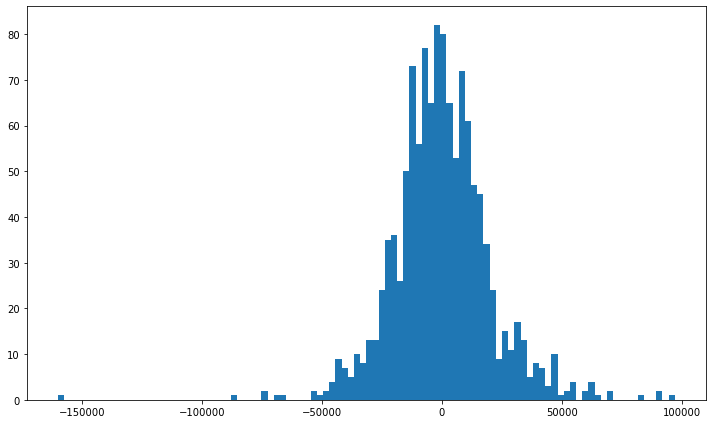

In [110]:
# Normality assumption 
plt.figure(figsize = (10, 6))
plt.hist(residuals, bins = 100);
plt.tight_layout()
plt.savefig('../images/histogramResiduals.png');

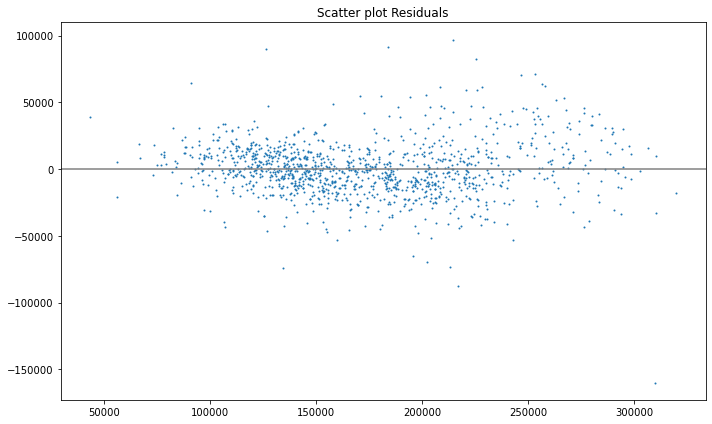

In [111]:
# Normality assumption 
plt.figure(figsize = (10,6))
plt.title("Scatter plot Residuals")
#Ploting Residuals - Scatter Plotf SLR Model 
plt.scatter(lr_y_preds, residuals,s=1);
plt.axhline(residuals.mean(), color='grey');
plt.tight_layout()
plt.savefig('../images/ScatterPlotResiduals.png');

In [112]:
y_train.head()

715     257000.0
1352    109000.0
879     133000.0
1283    192000.0
327     183000.0
Name: saleprice, dtype: float64

### Setting up Using OLS for Kaggle Submission
______

In [113]:
kag_lr_preds =  lr.predict(Z_test)

In [114]:
kag_lr_sub = {'id': df_test['id'], 'saleprice':kag_lr_preds}
kag_lr_sub = pd.DataFrame(kag_lr_sub)


In [115]:
kag_lr_sub.to_csv('../data/submission_ols.csv', index = False)

###  Ridge Regularization
___

In [116]:
# Set up a list of ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5, converts them to alphas between 10^0 and 10^5.
alphas = np.logspace(0, 5, 100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas = alphas, cv = 5)

# Fit model using best ridge alpha!
ridge_cv.fit(Z_train, y_train);
#

In [117]:

df_ridge_coef = pd.Series(ridge_cv.coef_, X_train.columns)
df_ridge_coef[ridge_cv.coef_!=0].sort_values(ascending=True);

In [118]:
# Here is the optimal value of alpha
ridge_cv.alpha_

73.90722033525779

In [119]:
print(ridge_cv.score(Z_train, y_train))
print(ridge_cv.score(Z_val, y_val))

0.8582798688860932
0.846044555847994


In [120]:
# Metrics
ridge_y_preds = ridge_cv.predict(Z_train)
ridge_residuals = y_train - ridge_y_preds

print(f'MAE: {metrics.mean_absolute_error(y_train, ridge_y_preds)}')
print(f'MSE: {metrics.mean_squared_error(y_train, ridge_y_preds)}')
print(f'RMSE: {metrics.mean_squared_error(y_train, ridge_y_preds, squared = False)}')
print(f'R2: {metrics.r2_score(y_train, ridge_y_preds)}')

MAE: 14870.599194684064
MSE: 421468408.29033387
RMSE: 20529.695767115834
R2: 0.8582798688860932


In [121]:
(ridge_cv.coef_**2).sum()

710450089.478296

In [122]:
(lr.coef_**2).sum()

1.4092785271980884e+32

### GridSeach for RidgeCV
___

In [123]:
#setting parameters
alphas = np.logspace(0, 5, 100)
parameters = {'alpha': alphas}

# define the grid search
ridge_grid= GridSearchCV(Ridge(), parameters, cv=5, verbose = -1);

#fit the grid search
ridge_grid.fit(Z_train, y_train);
ridge_grid.fit(Z_val, y_val);

In [124]:
# best model
best_ridge_model = ridge_grid.best_estimator_
best_ridge_model.fit(Z_train, y_train);


print(" Tunned Ridge ".center(18, "="))
print("Trainning:",ridge_grid.score(Z_train, y_train))
print("Validation:",ridge_grid.score(Z_val, y_val))
print("Dif:",ridge_grid.score(Z_train, y_train) - ridge_grid.score(Z_val, y_val))
print("Best Alpha Estimator:", ridge_grid.best_estimator_)

== Tunned Ridge ==
Trainning: 0.859098006840118
Validation: 0.8451671749372274
Dif: 0.013930831902890572
Best Alpha Estimator: Ridge(alpha=41.32012400115337)


________

#### Setting Up Test Using Ridge for Kaggle Submission 
___

In [125]:
X_test.shape

(878, 58)

In [126]:
kag_ridge_preds =  ridge_cv.predict(Z_test)

In [127]:
kag_ridge_sub = {'id': df_test['id'], 'saleprice':kag_ridge_preds}
kag_ridge_sub = pd.DataFrame(kag_ridge_sub)

In [128]:
kag_ridge_sub.to_csv('../data/submission_ridge.csv', index = False)

### Lasso Regularization
____

In [129]:
 # Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-5, 0, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5)



In [130]:
# Fitting model using best ridge alpha!
lasso_cv.fit(Z_train, y_train);

/Users/silviaresende/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 825067776.9311523, tolerance: 288690723.2458612
  model = cd_fast.enet_coordinate_descent_gram(
/Users/silviaresende/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 809434023.2200317, tolerance: 288690723.2458612
  model = cd_fast.enet_coordinate_descent_gram(
/Users/silviaresende/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 796147146.5654297, tolerance: 288690723.2458612
  model = cd_fast.enet_coordinate_descent_gram(
/Users/silviaresende/opt/anaconda3

In [131]:
# Here is the optimal value of alpha
lasso_cv.alpha_

1.0

In [132]:
# Metrics
lasso_y_preds = lasso_cv.predict(Z_train)
lasso_residuals = y_train - lasso_y_preds

print(f'MAE: {metrics.mean_absolute_error(y_train, lasso_y_preds)}')
print(f'MSE: {metrics.mean_squared_error(y_train, lasso_y_preds)}')
print(f'RMSE: {metrics.mean_squared_error(y_train, lasso_y_preds, squared = False)}')
print(f'R2: {metrics.r2_score(y_train, lasso_y_preds)}')

MAE: 14809.770407899892
MSE: 416870055.36558044
RMSE: 20417.395900691656
R2: 0.85982608010047


In [133]:
print(lasso_cv.score(Z_train, y_train))
print(lasso_cv.score(Z_val, y_val))

0.85982608010047
0.842332579124879


In [134]:
len(lasso_cv.coef_), len(X_train.columns)

(58, 58)

In [135]:
df_lasso_coef = pd.Series(lasso_cv.coef_, X_train.columns)
df_lasso_coef[df_lasso_coef!=0].sort_values(ascending=True)

overall_qual            -20245.829166
bldg_age                 -9957.930754
bldg_type__TwnhsE        -8859.293366
bldg_type__Twnhs         -7674.745307
bldg_type__Duplex        -4634.455725
bedroom_abvgr            -4382.352758
neighborhood__Gilbert    -3032.925027
neighborhood__CollgCr    -2920.418137
neighborhood__Edwards    -2806.783087
neighborhood__NAmes      -2643.160719
neighborhood__SawyerW    -2288.246663
neighborhood__NWAmes     -2162.786906
bldg_type__2fmCon        -2081.199129
neighborhood__Mitchel    -1887.769051
neighborhood__SWISU      -1821.599349
neighborhood__Sawyer     -1543.801815
ms_zoning__RM            -1505.524560
neighborhood__OldTown    -1480.338591
neighborhood__NPkVill    -1012.919709
ms_subclass__30           -863.729109
neighborhood__Timber      -754.735723
neighborhood__IDOTRR      -737.753971
ms_zoning__RH             -705.347538
ms_subclass__50           -441.144103
ms_subclass__190          -176.944467
ms_zoning__FV             -132.934102
ms_subclass_

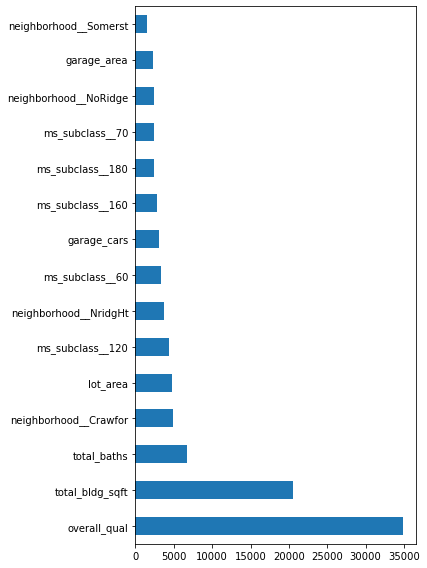

In [136]:
plt.figure(figsize=(6,8))
df_lasso_coef[df_lasso_coef!=0].sort_values(ascending=False).head(15).plot.barh()

ax = plt.gca()

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)

# saving image
plt.tight_layout()
plt.savefig('../images/lassoCoeficients.png');

### GridSearch for Lasso
___

In [137]:
# Create dictionary of hyperparameters.
param_ = {'alpha': np.logspace(-5, 0, 100)}

In [138]:
#Instantiate our GridSearchCV object.
lasso_grid = GridSearchCV(
    Lasso(), 
    param_ ,
    cv = 5, 
    verbose=1)

In [139]:
lasso_grid.fit(Z_train, y_train);

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/silviaresende/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.136e+10, tolerance: 2.791e+08
  model = cd_fast.enet_coordinate_descent(
/Users/silviaresende/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.255e+10, tolerance: 2.887e+08
  model = cd_fast.enet_coordinate_descent(
/Users/silviaresende/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

In [140]:
print(" Tunned Lasso ".center(18, "="))
print("Trainning:",lasso_grid.score(Z_train, y_train))
print("Validation:",lasso_grid.score(Z_val, y_val))
print("Dif:",lasso_grid.score(Z_train, y_train) - lasso_grid.score(Z_val, y_val))
print("Best Alpha Estimator:", lasso_grid.best_estimator_)

== Tunned Lasso ==
Trainning: 0.85982608010047
Validation: 0.842332579124879
Dif: 0.017493500975590992
Best Alpha Estimator: Lasso()


#### Setting Up Test Using Lasso  for Kaggle Submission
___


In [141]:
kag_lasso_preds =  lasso_cv.predict(Z_test)
kag_lasso_sub = {'id': df_test['id'], 'saleprice':kag_lasso_preds}
kag_lasso_sub = pd.DataFrame(kag_lasso_sub)

kag_lasso_sub.to_csv('../data/submission_lasso.csv', index = False)

### ElasticNet Regression
____

In [142]:
np.linspace(0.1, 1.0, 100)

array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.38181818, 0.39090909, 0.4       , 0.40909091,
       0.41818182, 0.42727273, 0.43636364, 0.44545455, 0.45454545,
       0.46363636, 0.47272727, 0.48181818, 0.49090909, 0.5       ,
       0.50909091, 0.51818182, 0.52727273, 0.53636364, 0.54545455,
       0.55454545, 0.56363636, 0.57272727, 0.58181818, 0.59090909,
       0.6       , 0.60909091, 0.61818182, 0.62727273, 0.63636364,
       0.64545455, 0.65454545, 0.66363636, 0.67272727, 0.68181818,
       0.69090909, 0.7       , 0.70909091, 0.71818182, 0.72727273,
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272

In [143]:
# Set up a list of alphas to check.
enet_alphas = np.linspace(0.05, 1.0, 100)

# Gets 0.8 ridge and 0.2 lasso regularization
enet_l1 = 0.8
# elastic model 
enet_cv = ElasticNetCV(alphas = enet_alphas, l1_ratio = enet_l1, cv = 5)
# Fit model 
enet_cv = enet_cv.fit(Z_train, y_train)
# Predicting
enet_cv_preds_train = enet_cv.predict(Z_train)
enet_cv_preds = enet_cv.predict(Z_val)
# Here is the optimal value of alpha.
enet_cv.alpha_

0.34747474747474744

In [144]:
# Evaluation
print("Trainning:", enet_cv.score(Z_train, y_train))
print("Validation:", enet_cv.score(Z_val, y_val))
print("Dif:", enet_cv.score(Z_train, y_train) - enet_cv.score(Z_val, y_val))

Trainning: 0.8580017641789197
Validation: 0.8462152736973476
Dif: 0.011786490481572098


### GriSearch for ElasticNet
_____

In [145]:
param_el = {'alpha': np.linspace(0.05, 1.0, 100)}

elast_grid = GridSearchCV(
                        ElasticNet(), 
                        param_el,  
                        cv=5,
                        verbose = 1)

elast_grid.fit(Z_train, y_train)  

elast_grid.best_params_, elast_grid.best_score_  

Fitting 5 folds for each of 100 candidates, totalling 500 fits


({'alpha': 0.14595959595959596}, 0.8396798148917333)

In [146]:
print(" Tunned ElasticNet ".center(26, "="))
print("Trainning:",elast_grid.score(Z_train, y_train))
print("Validation:",elast_grid.score(Z_val, y_val))
print("Dif:",elast_grid.score(Z_train, y_train) - elast_grid.score(Z_val, y_val))
print("Best Alpha Estimator:", elast_grid.best_estimator_)

=== Tunned ElasticNet ====
Trainning: 0.8578792085362268
Validation: 0.8462756581830637
Dif: 0.011603550353163072
Best Alpha Estimator: ElasticNet(alpha=0.14595959595959596)


### Summary Scores for OLS, Ridge and Lasso
___

In [147]:
# List of Scores
print("===============================")
print("Scores for OLS, Ridge and Lasso ")
print("===============================")
print()
print(" OLS ".center(18, "="))
print("Trainning:",lr.score(Z_train, y_train))
print("Validation:",lr.score(Z_val, y_val))
print("Dif:",lr.score(Z_train, y_train) - lr.score(Z_val, y_val))
print()
print(" Ridge ".center(18, "="))
print("Trainning:",ridge_cv.score(Z_train, y_train))
print("Validation:",ridge_cv.score(Z_val, y_val))
print("Dif:",ridge_cv.score(Z_train, y_train) - ridge_cv.score(Z_val, y_val))
print()
print(" Tunned Ridge ".center(18, "="))
print("Trainning:",ridge_grid.score(Z_train, y_train))
print("Validation:",ridge_grid.score(Z_val, y_val))
print("Dif:",ridge_grid.score(Z_train, y_train) - ridge_grid.score(Z_val, y_val))
print("Alpha:", ridge_grid.best_estimator_)
print()
print(" Lasso ".center(18, "="))
print("Trainning:",lasso_cv.score(Z_train, y_train))
print("Validation:",lasso_cv.score(Z_val, y_val))
print("Dif:",lasso_cv.score(Z_train, y_train) - lasso_cv.score(Z_val, y_val))
print()
print(" Tunned Lasso ".center(18, "="))
print("Trainning:",lasso_grid.score(Z_train, y_train))
print("Validation:",lasso_grid.score(Z_val, y_val))
print("Dif:",lasso_grid.score(Z_train, y_train) - lasso_grid.score(Z_val, y_val))
print("Best Alpha Estimator:", lasso_grid.best_estimator_)
print()
print(" ElasticNet ".center(18, "="))
print("Trainning:", enet_cv.score(Z_train, y_train))
print("Validation:", enet_cv.score(Z_val, y_val))
print("Dif:", enet_cv.score(Z_train, y_train) - enet_cv.score(Z_val, y_val))
print()
print(" Tunned ElasticNet ".center(26, "="))
print("Trainning:",elast_grid.score(Z_train, y_train))
print("Validation:",elast_grid.score(Z_val, y_val))
print("Dif:",elast_grid.score(Z_train, y_train) - elast_grid.score(Z_val, y_val))
print("Best Alpha Estimator:", elast_grid.best_estimator_)


Scores for OLS, Ridge and Lasso 

====== OLS =======
Trainning: 0.8598253241533164
Validation: 0.8422733142022257
Dif: 0.01755200995109063

===== Ridge ======
Trainning: 0.8582798688860932
Validation: 0.846044555847994
Dif: 0.012235313038099216

== Tunned Ridge ==
Trainning: 0.859098006840118
Validation: 0.8451671749372274
Dif: 0.013930831902890572
Alpha: Ridge(alpha=41.32012400115337)

===== Lasso ======
Trainning: 0.85982608010047
Validation: 0.842332579124879
Dif: 0.017493500975590992

== Tunned Lasso ==
Trainning: 0.85982608010047
Validation: 0.842332579124879
Dif: 0.017493500975590992
Best Alpha Estimator: Lasso()

=== ElasticNet ===
Trainning: 0.8580017641789197
Validation: 0.8462152736973476
Dif: 0.011786490481572098

=== Tunned ElasticNet ====
Trainning: 0.8578792085362268
Validation: 0.8462756581830637
Dif: 0.011603550353163072
Best Alpha Estimator: ElasticNet(alpha=0.14595959595959596)
